In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
import numpy as np
from sklearn import datasets, linear_model
import datetime
import time
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings(action='ignore')
Working_dir = os.getcwd()
plt.rc('font', family='serif', serif='Times New Roman', size = '8' )

---
## Energy use by jobs scope

In [4]:
lsf_df_consolid_scope = pd.read_excel(os.path.join( Working_dir, 'lsf_df_consolid_scope_renamed.xlsx'))

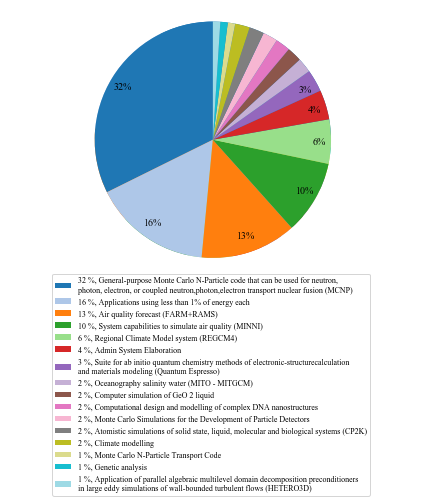

In [5]:
scope_clice = lsf_df_consolid_scope[(lsf_df_consolid_scope.energy_percentage>=0.5)]
                                 
# labels = scope_clice.application_performed_and_scope

cmap = plt.cm.tab20
colors = cmap(np.linspace(0., 1., scope_clice.shape[0]))


fracs = scope_clice.energy_percentage.apply( lambda x: int(round(x,0)) )
labels = ['%1.0f %%, %s' % (s, l) for s, l in zip(fracs,scope_clice.application_performed_and_scope)]
plt.pie(fracs, radius=20, colors=colors)
patches, texts, autotexts  = plt.pie(fracs, radius=20, startangle=90, autopct='%.f%%', colors=colors)

for patch, txt in zip(patches, autotexts):
    # the angle at which the text is located
    ang = (patch.theta2 + patch.theta1) / 2.
    # new coordinates of the text, 0.7 is the distance from the center 
    x = patch.r * 0.9 * np.cos(ang*np.pi/180)
    y = patch.r * 0.85 * np.sin(ang*np.pi/180)
    # if patch is narrow enough, move text to new coordinates
    
    if (patch.theta2 - patch.theta1) < 10.:
        txt.remove()
    else:
        txt.set_position((x,y))


plt.axis('equal')
plt.legend(patches, labels, bbox_to_anchor=(0.9, 0),prop={'size': 8})
# plt.legend( patches, loc = 'right', labels=['%1.0f %%, %s' % (s, l) for s, l in zip(fracs,labels)])#, bbox_to_anchor=(0.5, -0.3
plt.tight_layout()
plt.savefig(os.path.join(Working_dir, 'energy_cons_scope_1200.png'), bbox_inches='tight', dpi=1200)
plt.show()

---
## Energy waste by groups of applications

In [6]:
lsf_df_consolid_scope = pd.read_excel(os.path.join( Working_dir, 'lsf_df_consolid_scope_renamed.xlsx'))

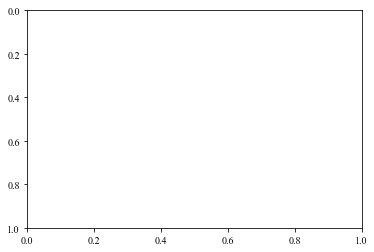

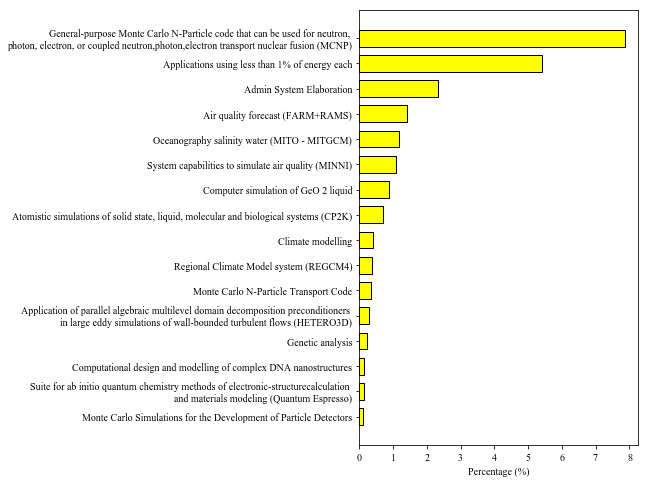

In [8]:
s=lsf_df_consolid_scope.energy_exit_percentage.sort_values(ascending=True)
s.index=lsf_df_consolid_scope.sort_values('energy_exit_percentage', ascending=True).application_performed_and_scope
fig, ax = plt.subplots()
plt.figure(figsize=(5,8))

cmap = plt.cm.tab20
colors = cmap(np.linspace(0., 1., len(s)))

N = 11
ind = np.arange(lsf_df_consolid_scope.shape[0]) *1.5   # the x locations for the groups
width = 0.6       # the width of the bars: can also be len(x) sequence

fig = plt.barh(ind, s,edgecolor='black', height=1, color='yellow')#en_exit_jobs_kWh, color='yellow',
ax.invert_yaxis()
plt.xlabel('Percentage (%)')
plt.yticks(ind, (s.index))

plt.savefig(os.path.join(Working_dir, 'ewr-percentage.png'),\
            bbox_inches='tight', \
            dpi=1200)
plt.show()

---
## Energy for useful jobs vs wasted energy, DCeP

In [9]:
summary = pd.read_excel( os.path.join( Working_dir, "energy_summary.xlsx" ) )

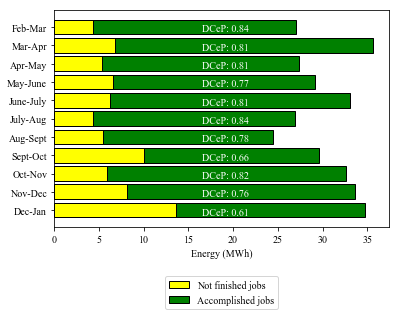

In [10]:
s=summary[['en_exit_jobs_kWh','en_done_jobs_kWh']].copy()
# s=summary[['en_exit_only_jobs_kWh','en_done_only_jobs_kWh']].copy()

s = s/1000

fig, ax = plt.subplots()

N = 11
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

# p1 = plt.barh(ind, s.en_exit_jobs_kWh, color='white', edgecolor='black', hatch='xx')
# p2 = plt.barh( ind, s.en_done_jobs_kWh, color='white', edgecolor='black', left = s.en_exit_jobs_kWh )

p1 = plt.barh(ind, s.iloc[:,0], color='yellow', edgecolor='black')#en_exit_jobs_kWh
p2 = plt.barh( ind, s.iloc[:,1], color='green', edgecolor='black', left = s.iloc[:,0] )
#en_done_jobs_kWh

plt.xlabel('Energy (MWh)')
plt.yticks(ind, ('Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-June', 'June-July',\
                'July-Aug', 'Aug-Sept', 'Sept-Oct','Oct-Nov', 'Nov-Dec',\
                'Dec-Jan'))


for i,j in zip(ind, s.iloc[:,0]):#s.en_exit_jobs_kWh
    ax.annotate('DCeP: %.2f'%round(summary.DCeP.iloc[i],2),
                xy=((s.iloc[:, 0].max())+3, i+0.25), size=10, color='white')
#     if i==9:
#         ax.annotate('DCeP: %.2f'%round(summary.DCeP_exit_done_only.iloc[i],2),
#                 xy=((summary.en_exit_only_jobs_kWh.iloc[9]/1000)+0.3, i+0.25), size=10, color='white')
#     else:
#         ax.annotate('DCeP: %.2f'%round(summary.DCeP_exit_done_only.iloc[i],2),
#                 xy=((summary.en_exit_only_jobs_kWh.iloc[7]/1000)+0.4, i+0.25), size=10, color='white') 

ax.invert_yaxis()
lgd = plt.legend((p1[0], p2[0]), ('Not finished jobs', 'Accomplished jobs'),\
#            loc='center center', bbox_to_anchor=(1, 0.6))
             loc='upper center', bbox_to_anchor=(0.5, -0.2))
fig.savefig(os.path.join(Working_dir, 'energy_cons_ex_done_no_title.png'),\
            bbox_extra_artists=(lgd,), bbox_inches='tight', \
            dpi=1200)
plt.show()

---
## Energy consumption ranges - using bins with 100 kWh sizes

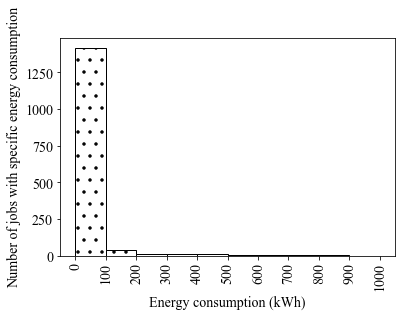

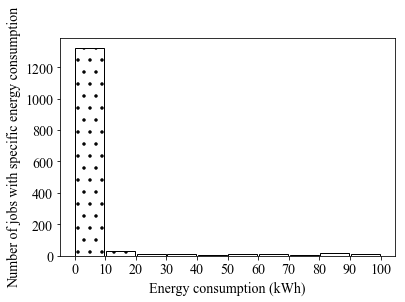

In [11]:
plt.rc('font', family='serif', serif='Times New Roman', size = '14' )

i = 0
left_time_border = datetime.datetime(2017,i+2,19,12,0)
if i>=10:
#     date_new = lsf_df.stop_timestamp_py.max().date()
    date_new = datetime.date(year=2018, month=1, day=25)
    right_time_border = datetime.datetime.combine(date_new, right_time_border.time())
else:
    right_time_border = datetime.datetime(2017,i+3,19,12,0)
m = 1
    
folder_name = Working_dir + "\\"\
          + left_time_border.strftime("%d.%m.%Y %H.%M") \
          + right_time_border.strftime(" - %d.%m.%Y %H.%M")

lsf_done_energy = pd.read_excel(os.path.join( folder_name, 'lsf_done_month_df.xlsx'))
lsf_exit_energy = pd.read_excel(os.path.join( folder_name, 'lsf_exited_month_df.xlsx'))

job_done_energy = lsf_done_energy.energy_done_kWh
job_exit_energy = lsf_exit_energy.energy_exit_kWh

job_all_energy = pd.concat([job_done_energy, job_exit_energy], axis=1)
job_all_energy = job_all_energy.sum(axis=1)

max_en = job_all_energy.values.max()
max_en -= max_en % -100
max_en = int(max_en)
bins = np.array(range(0,max_en,100))
groups = job_all_energy.groupby(pd.cut(job_all_energy,bins))

pos = (range(len(bins)-1))


plt.bar(pos, groups.size(), color='white', width = 1, edgecolor='black', hatch='.')
# plt.bar(pos, groups.size(), color='purple', width = 1, edgecolor='black')

plt.xlabel('Energy consumption (kWh)')
plt.ylabel('Number of jobs with specific energy consumption')
plt.xticks(np.append(np.array(pos), len(bins)-1)-0.5, bins.astype(int), rotation=90)

plt.savefig(os.path.join(folder_name, 'en_cons_ranges_no_colour.png'), bbox_inches='tight', dpi=900)
# plt.savefig(os.path.join(folder_name, 'en_cons_ranges.png'), bbox_inches='tight', dpi=900)
plt.show()

max_en = 110
bins = np.array(range(0,max_en,10))
groups = job_all_energy.groupby(pd.cut(job_all_energy,bins))

pos = (range(len(bins)-1))

# plt.bar(pos, groups.size(), color='purple', width = 0.95, edgecolor='black')
plt.bar(pos, groups.size(), color='white', width = 0.95, edgecolor='black', hatch='.')
plt.xlabel('Energy consumption (kWh)')
plt.ylabel('Number of jobs with specific energy consumption')
plt.xticks(np.append(np.array(pos), len(bins)-1)-0.5, bins.astype(int))

plt.savefig(os.path.join(folder_name, 'en_cons_ranges_granular_no_colour.png'), bbox_inches='tight', dpi=900)
# plt.savefig(os.path.join(folder_name, 'en_cons_ranges_granular.png'), bbox_inches='tight', dpi=900)
plt.show()

---
## Submissions of jobs which used less than/equal to 10 kWh per month, expressed in % of overall submissions observed during each month

In [12]:
summary = pd.read_excel( os.path.join( Working_dir, "energy_summary.xlsx" ) )

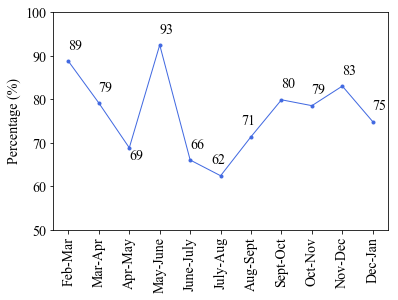

In [13]:
percent = summary.percentage_10_kWh.copy()

fig, ax = plt.subplots()

N = 11
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.plot(ind, percent, color='royalblue', linestyle='-', marker='o',linewidth=1, markersize=3)
# p1 = plt.plot(ind, percent, color='k', linestyle='-', marker='o',linewidth=1, markersize=3)

# plt.xlabel('Time interval')
plt.ylabel('Percentage (%)')

# plt.title('Ratio of processes with energy consumption \nwithin 10 kWh range')

plt.xticks(ind, ('Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-June', 'June-July',\
                'July-Aug', 'Aug-Sept', 'Sept-Oct','Oct-Nov', 'Nov-Dec',\
                'Dec-Jan'), rotation=90)
plt.yticks(range(50,110,10))

for i, j in zip(ind, percent):
    if (i==6 or i==5):
        ax.annotate(str(int(round(j))), xy=(i-0.3, j+2), horizontalalignment='left',
            verticalalignment='bottom')
    elif (i==2):
        ax.annotate(str(int(round(j))), xy=(i, j-3.5), horizontalalignment='left',
            verticalalignment='bottom')
    else:
        ax.annotate(str(int(round(j))), xy=(i, j+2), horizontalalignment='left',
            verticalalignment='bottom')

fig.savefig(os.path.join(Working_dir, 'en_cons_less_10_no_title_new.png'), bbox_inches='tight', dpi=1200)
plt.show()

---
## Short jobs' monthly energy consumption
*Short job* is a job that was runnning during 30 seconds or less. Such jobs are regarded to as one of energy waste reasons. 

This decision is motivated by empirical analysis. It had been observed that when a job execution starts, scheduler works within the first 30 seconds of the job execution, and the job itself is processed only after that time. Therefore, if a job is reported to have run for 30 seconds or less, in reality the job execution has not started at all. It implies that no results were obtained after execution of such jobs and arguments for considering such a job as energy waste cause.

In [14]:
summary = pd.read_excel( os.path.join( Working_dir, "energy_summary.xlsx" ) )

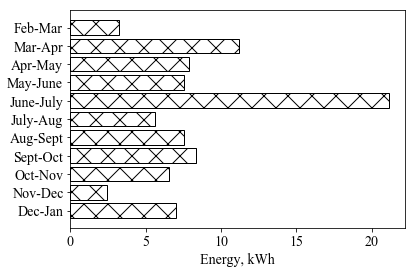

In [16]:
s=summary['en_exit_short_jobs_kWh'].copy()

fig, ax = plt.subplots()

N = 11
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh(ind, s, color='white', edgecolor='black', hatch='x')
# p1 = plt.barh(ind, s, color='lightseagreen', edgecolor='black')

plt.xlabel('Energy, kWh')
# plt.title('Energy consumption of jobs with maximum running time of 30 sec')
plt.yticks(ind, ('Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-June', 'June-July',\
                'July-Aug', 'Aug-Sept', 'Sept-Oct','Oct-Nov', 'Nov-Dec',\
                'Dec-Jan'))
ax.invert_yaxis()

fig.savefig(os.path.join(Working_dir, 'energy_cons_short_jobs_no_title_no_colour.png'), bbox_inches='tight', dpi=1200)
plt.show()

---
## Short and long jobs' monthly energy consumption
*Long job* is a job which was registered to have been running for a period of time, which exceeds the queue maximum running time.

Each job is allocated in a specific queue by LSF scheduler. In its turn, every queue has a limit of time within which any job from this queue could be executed. If a job exceeds this queue max time, it is kicked off from the queue and marked as having an "exit" status ("finished with error" status). Nevertheless, it does not mean that the job execution has not provided any result. The results were collected while the job was being executed within the queue maximum period, and this period of execution is marked as the one providing useful work. 

After exceeding the queue time limit, the job runs for some time before being dropped from the queue. This amount of time is marked as an "energy waste" period.

In [17]:
summary = pd.read_excel( os.path.join( Working_dir, "energy_summary.xlsx" ) )

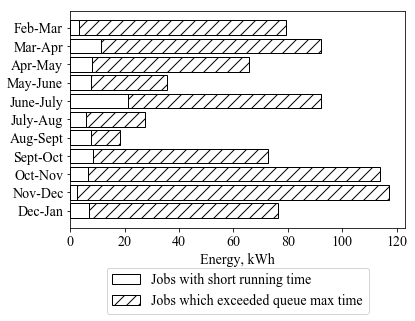

In [19]:
s=summary[['en_exit_short_jobs_kWh', \
           'en_exit_long_jobs_remainder_kWh', \
           'en_exit_jobs_kWh']].copy()

fig, ax = plt.subplots()

N = 11
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

# p1 = plt.barh(ind, s.en_exit_short_jobs_kWh, color='lightseagreen', edgecolor='black')/
p1 = plt.barh(ind, s.en_exit_short_jobs_kWh, color='white', edgecolor='black', hatch='0')

# p2 = plt.barh( ind, s.en_exit_long_jobs_remainder_kWh, color='khaki', edgecolor='black', left = s.en_exit_short_jobs_kWh )
p2 = plt.barh( ind, s.en_exit_long_jobs_remainder_kWh, \
              color='white', edgecolor='black', hatch='//',\
              left = s.en_exit_short_jobs_kWh )
plt.xlabel('Energy, kWh')
# plt.title('Energy waste categories')
plt.yticks(ind, ('Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-June', 'June-July',\
                'July-Aug', 'Aug-Sept', 'Sept-Oct','Oct-Nov', 'Nov-Dec',\
                'Dec-Jan'))
ax.invert_yaxis()

lgd = plt.legend((p1[0], p2[0]), ('Jobs with short running time', 'Jobs which exceeded queue max time'),\
           loc='upper center', bbox_to_anchor=(0.5, -0.15))

fig.savefig(os.path.join(Working_dir, 'energy_cons_ex_long_and_short_jobs_no_title_no_colour.png'),\
            bbox_extra_artists=(lgd,), bbox_inches='tight',\
            dpi=900)
plt.show()

---
## Energy consumption of jobs which ended with errors for other reasons than having too short or too long execution time 

In [20]:
summary = pd.read_excel( os.path.join( Working_dir, "energy_summary.xlsx" ) )

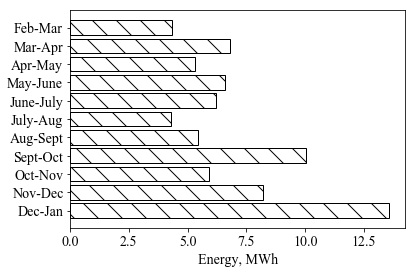

In [22]:
s=summary[['en_exit_jobs_kWh']].copy()

fig, ax = plt.subplots()

N = 11
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

# p3 = plt.barh( ind, s.en_exit_jobs_kWh/1000., color='yellowgreen', edgecolor='black')
p3 = plt.barh( ind, s.en_exit_jobs_kWh/1000., color='white', edgecolor='black', hatch='\\')
plt.xlabel('Energy, MWh')
# plt.title('Energy waste category\nJobs not accomplished for other reasons')
plt.yticks(ind, ('Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-June', 'June-July',\
                'July-Aug', 'Aug-Sept', 'Sept-Oct','Oct-Nov', 'Nov-Dec',\
                'Dec-Jan'))
ax.invert_yaxis()

fig.savefig(os.path.join(Working_dir, 'energy_cons_exit_only_jobs_no_title_no_colour.png'),\
            bbox_inches='tight',\
            dpi=1200)
plt.show()

---
## Percentage of monthly energy consumed by short jobs

In [28]:
summary = pd.read_excel( os.path.join( Working_dir, "energy_summary.xlsx" ) )

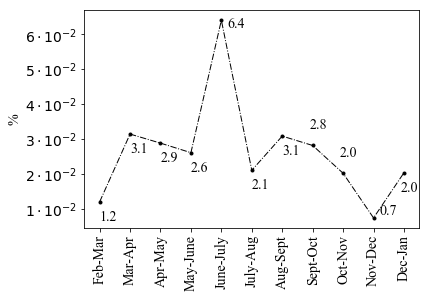

In [39]:
percent_short_jobs = summary.percentage_energy_short_jobs

fig, ax = plt.subplots()

N = 11
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.plot(ind, percent_short_jobs, color='k', linestyle='-.', marker='o',\
              markersize=3, linewidth=1)#lightseagreen

# plt.xlabel('Time interval')
# plt.ylabel(r'$\times 10^{-2}$, %')
plt.ylabel(r'%')

import matplotlib.ticker as ticker
def myticks(x,pos):

    if x == 0: return "$0$"

    coeff = round(x*100.,1)
    return r"${:2.0f} \cdot 10^{{ {:2d} }}$".format(coeff,-2)

ax.yaxis.set_major_formatter(ticker.FuncFormatter(myticks))
# plt.yscale('log')

for i, j in zip(ind, percent_short_jobs):
    if (i==4):
        j_pos=j-0.003
        i_pos=i+0.2
    elif (i==9):
        j_pos=j
        i_pos=i+0.2
    elif (i==8 or i==7):
        j_pos=j+0.004
        i_pos=i-0.1
    elif (i==10):
        j_pos=j-0.0062
        i_pos=i-0.1
    else:
        j_pos=j-0.0062
        i_pos=i
    ax.annotate(str(round(j*100, 1)), xy=(i_pos, j_pos), horizontalalignment='left',
        verticalalignment='bottom')

# plt.title('Ratio of energy consumed by jobs with short running time\nwith relation to overall energy consumtpion')

plt.xticks(ind, ('Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-June', 'June-July',\
                'July-Aug', 'Aug-Sept', 'Sept-Oct','Oct-Nov', 'Nov-Dec',\
                'Dec-Jan'), rotation=90)

fig.savefig(os.path.join(Working_dir, 'en_cons_short_jobs_energy_percent_no_title_no_colour.png'), bbox_inches='tight',\
           dpi=1200)
plt.show()

---
## Ratio of submitted jobs with short running time with relation to overall number of submitted jobs

In [40]:
summary = pd.read_excel( os.path.join( Working_dir, "energy_summary.xlsx" ) )

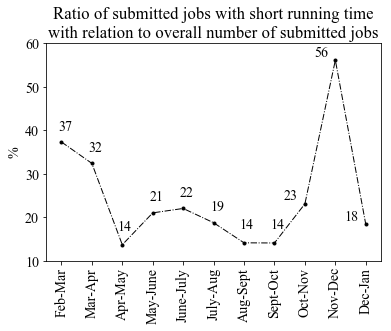

In [41]:
fig, ax = plt.subplots()

N = 11
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.plot(ind, summary.percentage_short_jobs, color='k', linestyle='-.', marker='o',\
              markersize=3, linewidth=1)#color='lightseagreen'

# plt.xlabel('Time interval')
plt.ylabel('%')

for i, j in zip(ind, summary.percentage_short_jobs):
    if (i>=8):
        j_pos=j+0.2
        i_pos=i-0.7
    elif (i in [2,6,7]):
        i_pos=i-0.15
        j_pos=j+2.5
    else:
        j_pos=j+2
        i_pos=i-0.1
    ax.annotate(str(int(round(j))), xy=(i_pos, j_pos), horizontalalignment='left',
        verticalalignment='bottom')

plt.title('Ratio of submitted jobs with short running time\nwith relation to overall number of submitted jobs')
plt.yticks(range(10,65,10))
plt.xticks(ind, ('Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-June', 'June-July',\
                'July-Aug', 'Aug-Sept', 'Sept-Oct','Oct-Nov', 'Nov-Dec',\
                'Dec-Jan'), rotation=90)

fig.savefig(os.path.join(Working_dir, 'number_percent_short_jobs_no_colour.png'), bbox_inches='tight',\
           dpi=1200)
plt.show()

---
## Ratios of short and long jobs' submissions with relation to overall monthly submissions of jobs

In [ ]:
summary = pd.read_excel( os.path.join( Working_dir, "energy_summary.xlsx" ) )

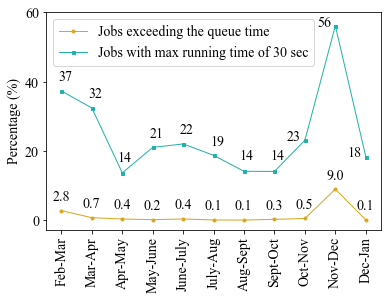

In [42]:
fig, ax = plt.subplots()

N = 11
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.plot(ind, summary.percentage_long_jobs, color='goldenrod', \
              linestyle='-', marker='o',\
              markersize=3, linewidth=1)#color='lightseagreen''k',linestyle=':'

p2 = plt.plot(ind, summary.percentage_short_jobs, color='lightseagreen', \
              linestyle='-', marker='s',\
              markersize=3, linewidth=1)#color='lightseagreen''k',linestyle='-.'

# plt.xlabel('Time interval')
plt.ylabel('Percentage (%)')

for i, j in zip(ind, summary.percentage_short_jobs):
    if (i>=8):
        j_pos=j-1
        i_pos=i-0.6
    elif (i in [2,6,7]):
        i_pos=i-0.15
        j_pos=j+2.5
    else:
        j_pos=j+2
        i_pos=i-0.1
    ax.annotate(str(int(round(j))), xy=(i_pos, j_pos), horizontalalignment='left',
        verticalalignment='bottom')

for i, j in zip(ind, summary.percentage_long_jobs):
    j_pos=j+2
    i_pos=i-0.3
    ax.annotate(str(round(j,1)), xy=(i_pos, j_pos), horizontalalignment='left',
        verticalalignment='bottom')
    
# plt.title('Ratio of submitted jobs with short running time\nor exceeding the queue time\nwith relation to overall number of submitted jobs')
plt.yticks(range(0,67,20))

lgd = plt.legend((p1[0], p2[0]), ( 'Jobs exceeding the queue time', 'Jobs with max running time of 30 sec' ),\
           loc='upper left')#, bbox_to_anchor=(0.5, -0.3))
plt.xticks(ind, ('Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-June', 'June-July',\
                'July-Aug', 'Aug-Sept', 'Sept-Oct','Oct-Nov', 'Nov-Dec',\
                'Dec-Jan'), rotation=90)

fig.savefig(os.path.join(Working_dir, 'number_percent_short_long_jobs_no_title_new.png'), bbox_inches='tight',\
           dpi=1200)
plt.show()

---
## Monthly energy consumption of short and long jobs expressed in percents of the cluster's monthly energy consumption  

In [43]:
summary = pd.read_excel( os.path.join( Working_dir, "energy_summary.xlsx" ) )

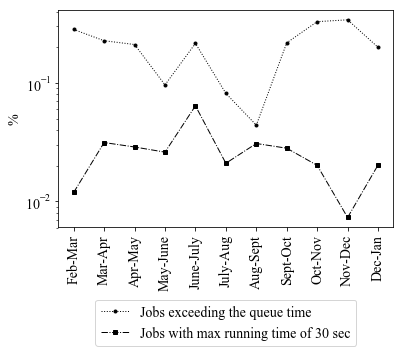

In [47]:
percent_short_jobs = summary.percentage_energy_short_jobs
percent_long_jobs = summary.percentage_energy_long_jobs


fig, ax = plt.subplots()

N = 11
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.plot(ind, percent_long_jobs, color='k', linestyle=':', marker='o', markersize=3, linewidth=1)#lightseagreen
p2 = plt.plot(ind, percent_short_jobs, color='k', linestyle='-.', marker='s', markersize=3.5, linewidth=1)#lightseagreen
plt.ylabel('%')
ax.semilogy()

# plt.title('Ratio of energy consumed by jobs with running time\nexceeding max queue time\nand short duration jobs')
plt.xticks(ind, ('Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-June', 'June-July',\
                'July-Aug', 'Aug-Sept', 'Sept-Oct','Oct-Nov', 'Nov-Dec',\
                'Dec-Jan'), rotation=90)
lgd = plt.legend((p1[0], p2[0]), ( 'Jobs exceeding the queue time', 'Jobs with max running time of 30 sec' ),\
           loc='upper center', bbox_to_anchor=(0.5, -0.3))
fig.savefig(os.path.join(Working_dir, 'en_cons_short_long_jobs_energy_percent_no_title_no_colour_logy.png'), \
            bbox_inches='tight' ,\
           dpi=1200)
plt.show()

---
## Ratio of submitted jobs with the running time exceeding the queue time limit with relation to overall number of submitted jobs, expressed in percents per month

In [48]:
summary = pd.read_excel( os.path.join( Working_dir, "energy_summary.xlsx" ) )

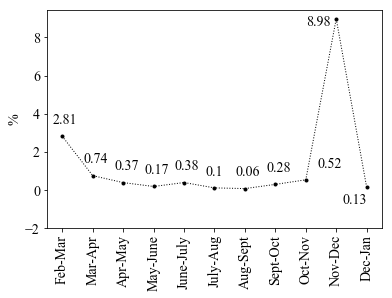

In [49]:
fig, ax = plt.subplots()

N = 11
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.plot(ind, summary.percentage_long_jobs, color='k', \
              linestyle=':', marker='o',\
              markersize=3, linewidth=1)#color='lightseagreen'

plt.ylabel('%')

for i, j in zip(ind, summary.percentage_long_jobs):
    j_pos=j+0.5
    i_pos=i-0.3
    if (i==9):
        j_pos=j-0.5
        i_pos=i-1
    elif (i==8):
        i_pos=i+0.4
    elif (i==10):
        j_pos=j-1
        i_pos=i-0.8
    ax.annotate(str(round(j,2)), xy=(i_pos, j_pos), horizontalalignment='left',
        verticalalignment='bottom')
    
# plt.title('Ratio of submitted jobs with running time\nexceeding the queue time\nwith relation to overall number of submitted jobs')
plt.yticks(range(-2,10,2))

plt.xticks(ind, ('Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-June', 'June-July',\
                'July-Aug', 'Aug-Sept', 'Sept-Oct','Oct-Nov', 'Nov-Dec',\
                'Dec-Jan'), rotation=90)

fig.savefig(os.path.join(Working_dir, 'number_percent_long_jobs_no_title_no_colour.png'), bbox_inches='tight',\
           dpi=1200)
plt.show()

---
## Queues analysis. Monthly energy consumption. EWR

In [51]:
queue_summary_global = pd.read_excel(os.path.join( Working_dir, 'queue_summary_global_q.xlsx'))

In [53]:
s = queue_summary_global.energy_kWh

In [63]:
# Rename index to replace queue names with IDs
s.index = range(1, len(s)+1)

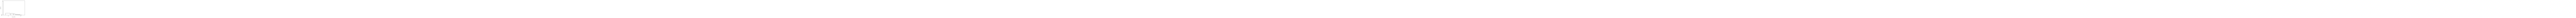

In [66]:
# font characteristics
plt.rc('font', family='serif', serif='Times New Roman', size = '9' )

s = queue_summary_global.energy_kWh
ewr = queue_summary_global.EWR_percentage
fig, ax = plt.subplots()
N = np.arange(s.shape[0])
ind = np.arange(s.shape[0])    # the x locations for the groups
width = 0.6       # the width of the bars: can also be len(x) sequence

# p1 = plt.barh(ind, s, color='steelblue', edgecolor='black')
p1 = plt.bar(ind, s, color='white', edgecolor='black', ) # hatch='\\',
# p1 = plt.barh(ind, s, color='silver', edgecolor='black',)

ax.set_xscale('log')

plt.ylabel('Queue ID')
plt.xlabel('Energy (kWh)')
plt.yticks(ind, s.index, rotation=0 )
for i,j in zip(ind, s):#s.en_exit_jobs_kWh
    ax.annotate('EWR: %.2f'%round(ewr.iloc[i],2),
                xy=(s.iloc[1]+10000, i-0.25), size=8, color='k')
#     ax.axhline(i,format(s[i],'1.0e'),0.825, color='k', lw=0.5, ls=':')
#     print(base(format(s[i],'1.0e')))

fig.savefig(os.path.join(Working_dir, 'queue_en_cons_and_ewr_no_title_v2_queue_name.png'), bbox_inches='tight', dpi=1200)
plt.show()

---
## Energy consumption of each queue during the overall period of 11 months

In [72]:
queue_summary_global = pd.read_excel( os.path.join( Working_dir, 'queue_summary_global_q.xlsx') )

In [75]:
# Rename index to replace queue names with IDs
queue_summary_global.index = range(1, len(s)+1)

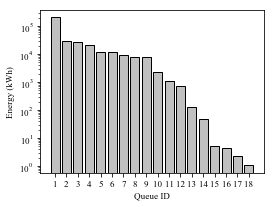

In [131]:
plt.rc('font', family='serif', serif='Times New Roman', size = '9' )

s=queue_summary_global.energy_kWh
fig, ax = plt.subplots()
fig.set_size_inches( 4, 3 )

N = np.arange(s.shape[0])
ind = np.arange(s.shape[0])    # the x locations for the groups
width = 0.6       # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, s, color='lightseagreen', edgecolor='black')
# p1 = plt.bar(ind, s, color='white', edgecolor='black', hatch='\\',)
p1 = plt.bar(ind, s, color='silver', edgecolor='black',)

ax.set_yscale('log')

# plt.xlabel('Queue name')
plt.xlabel('Queue ID')
plt.ylabel('Energy (kWh)')
plt.xticks(ind, s.index, ) # rotation='vertical'

fig.savefig(os.path.join(Working_dir, 'queue_en_cons_no_title_no_colour_v2.png'), bbox_inches='tight', dpi=1200)
plt.show()

---
## Queue EWR = wasted energy over the global period / energy used for useful jobs and jobs causing waste during overall period

In [77]:
queue_summary_global = pd.read_excel( os.path.join( Working_dir, 'queue_summary_global_q.xlsx') )

In [78]:
# Rename index to replace queue names with IDs
queue_summary_global.index = range(1, len(s)+1)

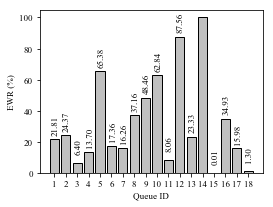

In [132]:
s=queue_summary_global['EWR_percentage'].copy()
fig, ax = plt.subplots()

plt.rc('font', family='serif', serif='Times New Roman', size = '9' )
fig.set_size_inches( 4, 3 )

N = np.arange(s.shape[0])
ind = np.arange(s.shape[0])    # the x locations for the groups
width = 0.6       # the width of the bars: can also be len(x) sequence

# p1 = plt.bar(ind, s, color='lemonchiffon', edgecolor='black')
# p1 = plt.bar(ind, s, color='white', edgecolor='black', hatch='///')
p1 = plt.bar(ind, s, color='silver', edgecolor='black',)


# plt.xlabel('Queue name')
plt.xlabel('Queue ID')
plt.ylabel('EWR (%)')
plt.xticks(ind, s.index, ) # rotation='vertical' 

for (i, j) in zip(ind, s):
    ax.annotate('%.2f'%round(queue_summary_global.EWR_percentage.iloc[i],2),
                xy=( i-0.25, j+12, ), size=10, color='black', rotation='vertical', fontsize=9)

fig.savefig(os.path.join(Working_dir, 'queue_ewr_no_title_v2.png'), bbox_inches='tight', dpi=1200)
plt.show()

---
## Number of jobs submitted to queues over the global time period

In [80]:
queue_summary_global = pd.read_excel( os.path.join( Working_dir, "queue_summary_global_q.xlsx" ) )

In [81]:
# Rename index to replace queue names with IDs
queue_summary_global.index = range(1, len(s)+1)

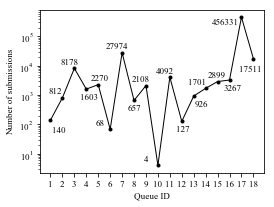

In [170]:
s = queue_summary_global.no_of_submitted_jobs.copy()
s.index = range(1, len(s)+1, 1)
fig, ax = plt.subplots()

plt.rc('font', family='serif', serif='Times New Roman', size = '9' )
fig.set_size_inches( 4, 3 )

N = s.shape[0]
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

# p1 = plt.plot(ind, s, color='royalblue', linestyle='-', marker='o',linewidth=1, markersize=3, )
p1 = plt.plot(ind, s, color='k', linestyle='-', marker='o',linewidth=1, markersize=3)
plt.xticks(ind, s.index )

# plt.xlabel('Queue name')
plt.xlabel('Queue ID')
plt.ylabel('Number of submissions')

ax.set_yscale('log')

for i, j in zip(ind, s):
    j_pos=j*1.2
    i_pos=i-1.2
    if (i==3 or i==7 or i==11 or i==15):
        j_pos=j/2.5
        i_pos=i-0.5
    elif (i==0):
        j_pos=j/3
        i_pos=i+0.1
    elif (i==6):
        j_pos=j*1.2
        i_pos=i-1.4
    elif (i==12):
        j_pos=j/2.5
        i_pos=i+0.1
    elif (i==13):
        i_pos=i-1.5
    elif (i==16):
        j_pos=j/2
        i_pos=i-2.5
    elif (i==17):
        i_pos=i-1.2
        j_pos=j/3
    elif (i==4):
        i_pos=i-0.6
    elif (i==14):
        i_pos=i-0.8
    ax.annotate(str(int(round(j))), xy=(i_pos, j_pos), horizontalalignment='left',
        verticalalignment='bottom', fontsize=9)
fig.savefig(os.path.join(Working_dir, 'no_of_jobs_per_queue_v2_id.png'), bbox_inches='tight', dpi=300)
plt.show()

---
## Carbon emissions per month, calculated using carbon factor

In [83]:
summary = pd.read_excel( os.path.join( Working_dir, "energy_summary.xlsx" ) )

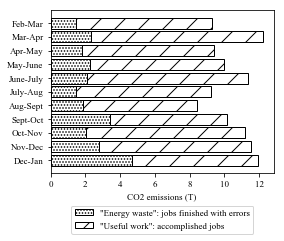

In [179]:
s=summary[['CO2e_exit_jobs_t','CO2e_all_jobs_t']].copy()

fig, ax = plt.subplots()
plt.rc('font', family='serif', serif='Times New Roman', size = '9' )
fig.set_size_inches( 4, 3 )

N = 11
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.barh( ind, s.iloc[:,0], color='white', edgecolor='black', hatch='....')
p2 = plt.barh( ind, s.iloc[:,1]-s.iloc[:,0], color='white', edgecolor='black', left = s.iloc[:,0], hatch='/' )

# p1 = plt.barh(ind, s.iloc[:,0], color='lightsalmon', edgecolor='black')#en_exit_jobs_kWh
# p2 = plt.barh( ind, s.iloc[:,1]-s.iloc[:,0], color='lightslategrey', edgecolor='black', left = s.iloc[:,0] )
#en_done_jobs_kWh

plt.xlabel('CO2 emissions (T)')
plt.yticks(ind, ('Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-June', 'June-July',\
                'July-Aug', 'Aug-Sept', 'Sept-Oct','Oct-Nov', 'Nov-Dec',\
                'Dec-Jan'))


ax.invert_yaxis()
lgd = plt.legend((p1[0], p2[0]), ('"Energy waste": jobs finished with errors', '"Useful work": accomplished jobs'),\
             loc='upper center', bbox_to_anchor=(0.5, -0.17))
fig.savefig(os.path.join(Working_dir, 'co2e_ex_done_no_title_no_colour.png'),\
            bbox_extra_artists=(lgd,), bbox_inches='tight', \
            dpi=1200)
plt.show()

---
## Graphs for parallel vs serial jobs
- EWR
- Submissions
- Energy consumption

All values are calculated per month and are expressed as percentage with relation to corresponding characteristics of overall time period 

In [85]:
parallel_summary_global = pd.read_excel( os.path.join( Working_dir, "parallel_summary_global.xlsx" )  )
serial_summary_global = pd.read_excel( os.path.join( Working_dir, "serial_summary_global.xlsx" )  )

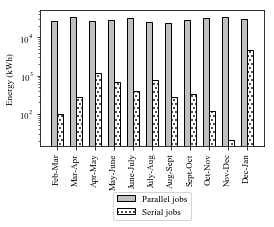

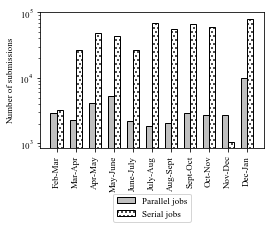

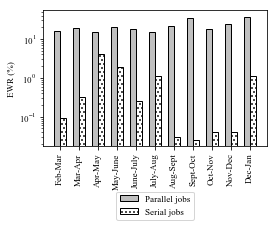

In [176]:
def plot_ps(df, name, ylabel, logscale=True):
    fig, ax = plt.subplots()
    
    plt.rc('font', family='serif', serif='Times New Roman', size = '9' )
    fig.set_size_inches( 4, 2.5 )

    N = 33
    ind1 = np.arange(0,N,3)    # the x locations for the groups
    ind2 = np.arange(1,N,3)
    w = 1      # the width of the bars: can also be len(x) sequence

    p1 = plt.bar( ind1, df.iloc[:,0], color='silver', edgecolor='black', width=w )#
    p2 = plt.bar( ind2, df.iloc[:,1], color='white', edgecolor='black', hatch='...', width=w )

    plt.ylabel(ylabel)
    
    ticks = ['Feb-Mar', 'Mar-Apr', 'Apr-May', 'May-June', 'June-July',\
                'July-Aug', 'Aug-Sept', 'Sept-Oct','Oct-Nov', 'Nov-Dec',\
                'Dec-Jan']
    plt.xticks([x+0.5 for x in range(0,33,3)], ticks, rotation=90)
    if logscale:
        plt.yscale('log')
    lgd = plt.legend((p1[0], p2[0]), ('Parallel jobs', 'Serial jobs'), loc='upper center', bbox_to_anchor=(0.5, -0.3))
    fig.savefig(os.path.join(Working_dir, name),\
                bbox_extra_artists=(lgd,), bbox_inches='tight', \
                dpi=1200)
    plt.show()
    
df = pd.DataFrame({'Parallel jobs': parallel_summary_global.energy_kWh,
                    'Serial jobs': serial_summary_global.energy_kWh}, )
plot_ps(df, 'ps_en_cons_log_no_color.png', 'Energy (kWh)')

df = pd.DataFrame({'Parallel jobs': parallel_summary_global.no_of_submissions,
                    'Serial jobs': serial_summary_global.no_of_submissions}, )
plot_ps(df, 'ps_submissions_log_no_color.png', 'Number of submissions')

df = pd.DataFrame({'Parallel jobs': parallel_summary_global.EWR,
                    'Serial jobs': serial_summary_global.EWR}, )
plot_ps(df, 'ps_ewr_log_no_color.png', 'EWR (%)')